# Sparse Hebbian Learning with full homeostasis : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence the way we select dictionary elements and thus the homeostasis.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'rescaling'

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_Pcum']
display_variables = ['error', 'logL', 'qerror', 'aerror', 'MI', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']

In [4]:
!ls -l {experiments.shl.data_cache}/{tag}*
!ls -l {experiments.shl.data_cache}/{tag}*lock*

ls: {experiments.shl.data_cache}/{tag}*: No such file or directory
ls: {experiments.shl.data_cache}/{tag}*lock*: No such file or directory


## different rescaling values

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (65520, 324) - done in 0.10s.
No cache found data_cache/rescaling - C=0.50000_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  129 /   1025 (elapsed time:  106s,   1mn  46s)
Iteration  257 /   1025 (elapsed time:  216s,   3mn  36s)
Iteration  385 /   1025 (elapsed time:  328s,   5mn  28s)
Iteration  513 /   1025 (elapsed time:  440s,   7mn  20s)
Iteration  641 /   1025 (elapsed time:  548s,   9mn   8s)
Iteration  769 /   1025 (elapsed time:  657s,  10mn  57s)
Iteration  897 /   1025 (elapsed time:  762s,  12mn  42s)
Iteration  1025 /   1025 (elapsed time:  861s,  14mn  21s)
done in 868.59s.
loading the dico called : data_cache/rescaling - C=0.50000_dico.pkl
No cache found data_cache/rescaling - C=0.79370_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning]

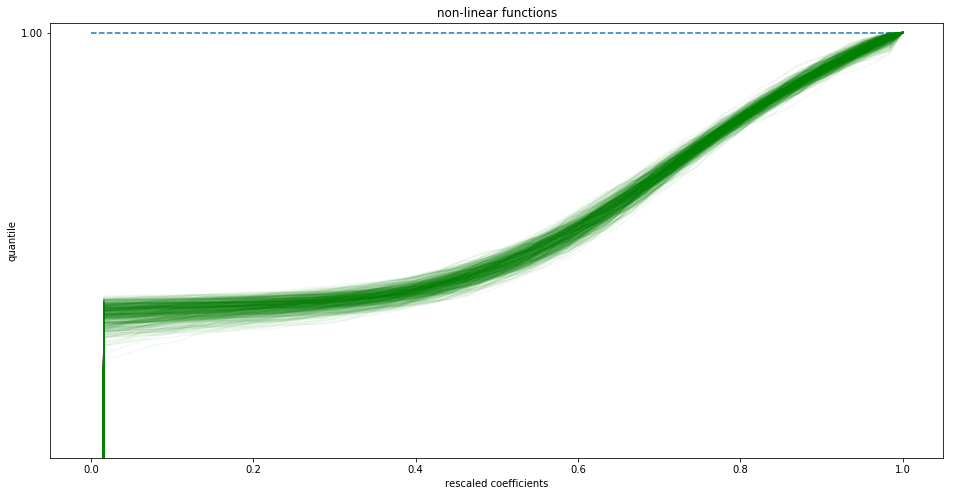

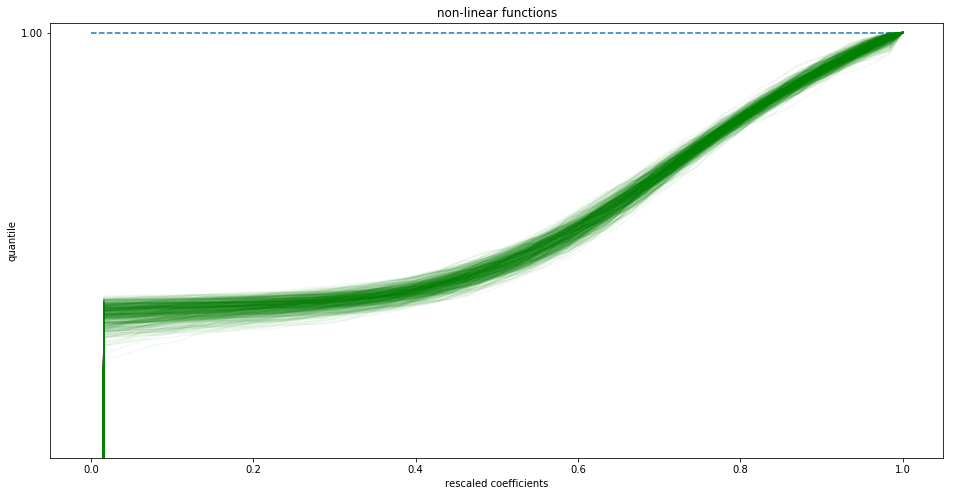

loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl
loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl


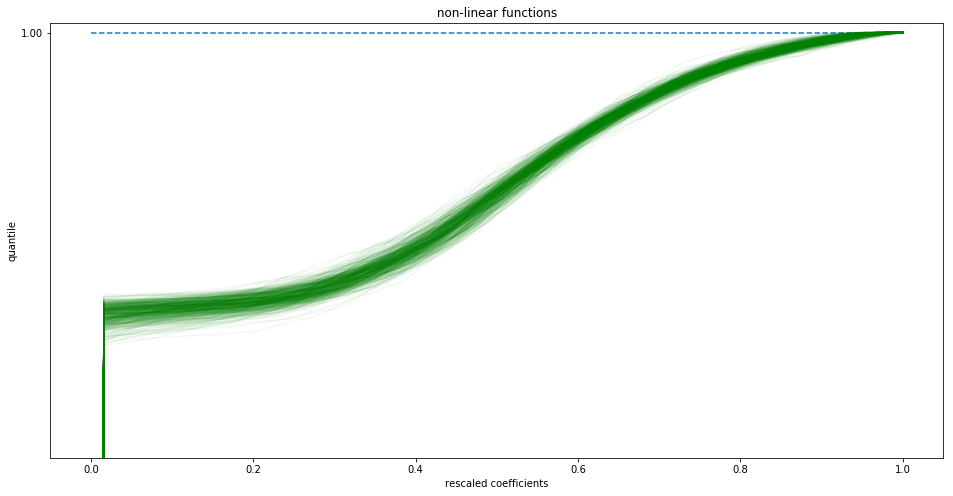

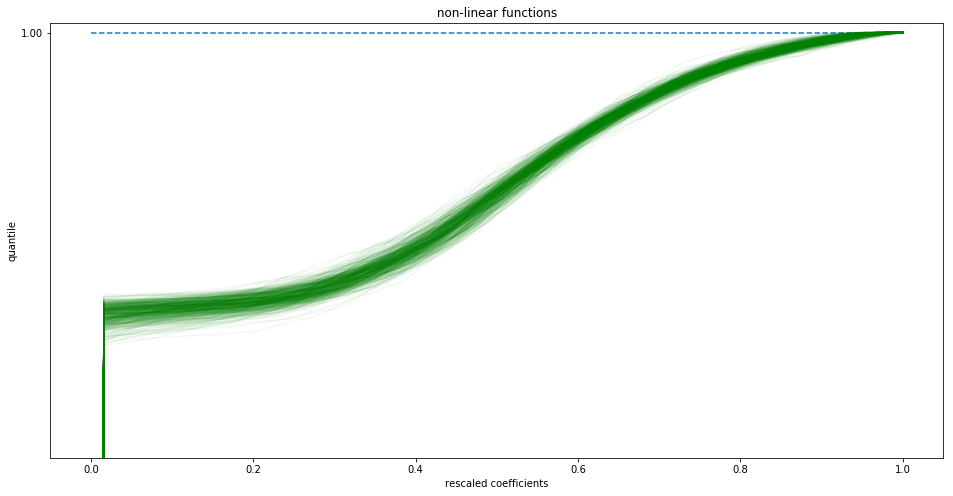

loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl
loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl


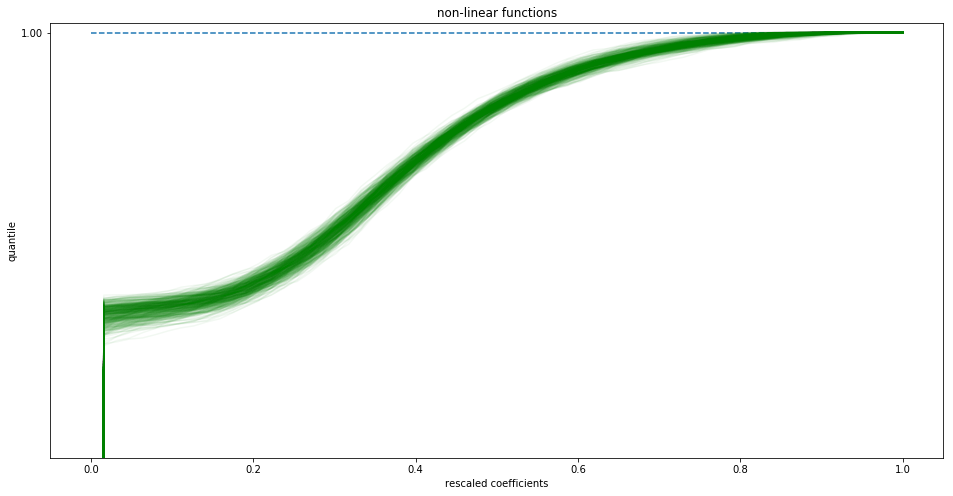

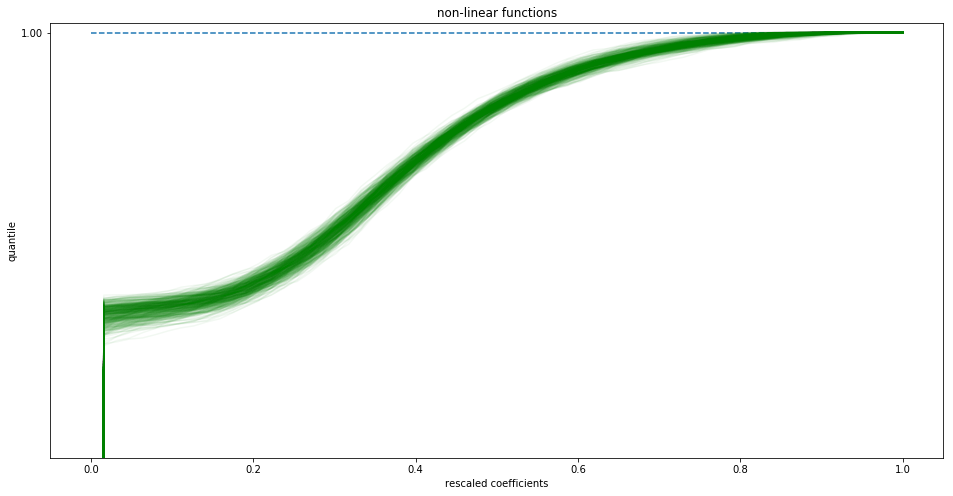

loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl


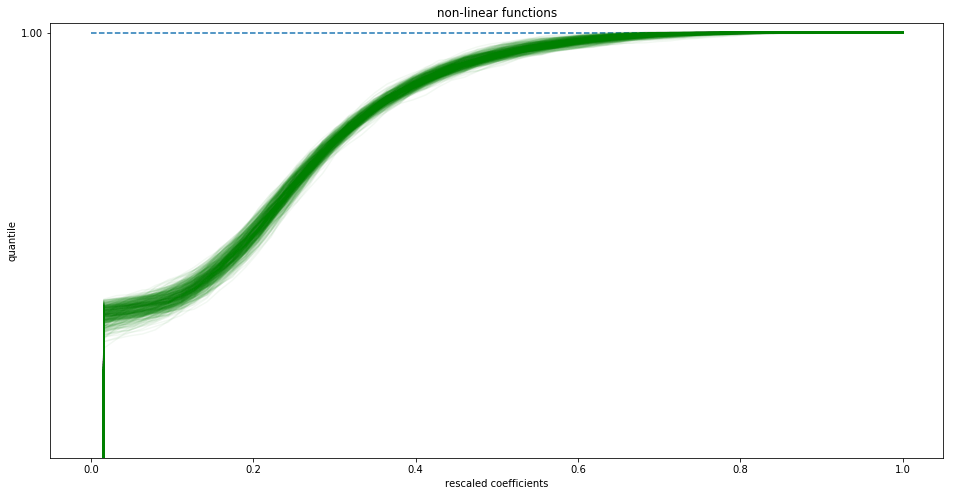

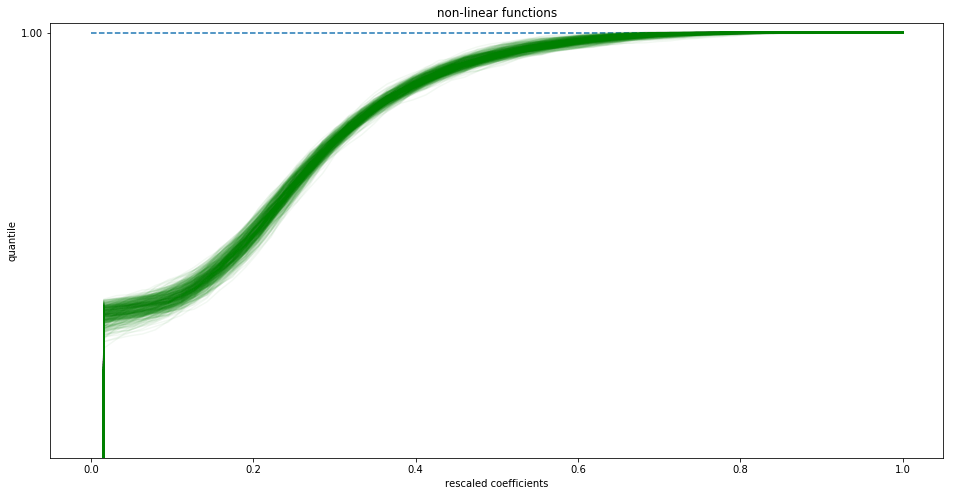

loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl
loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl


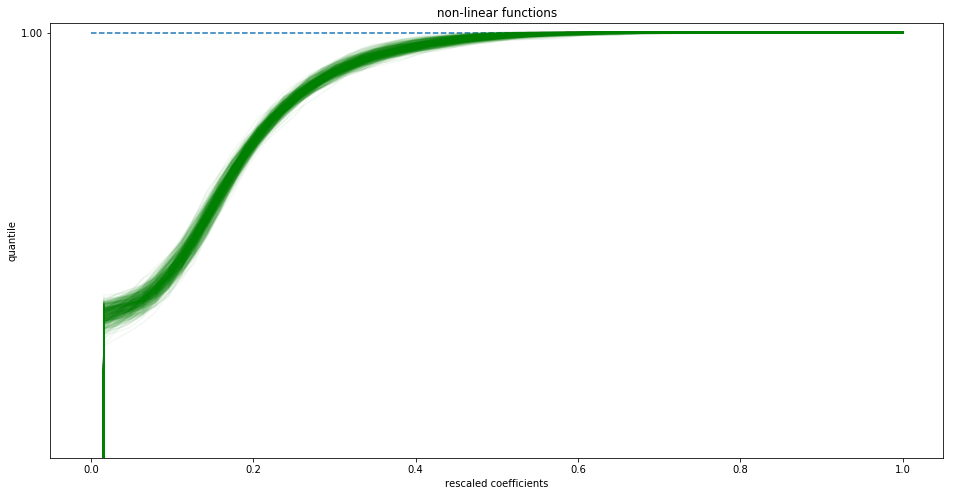

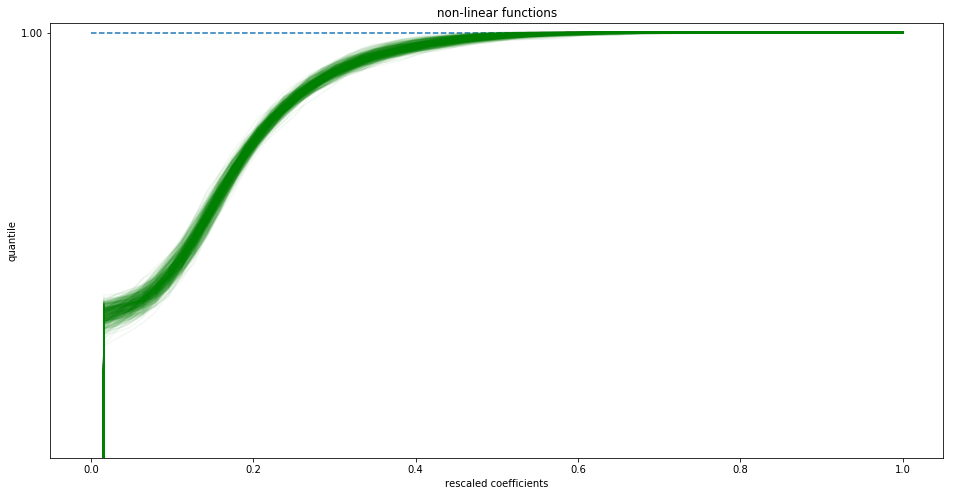

loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl
loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl


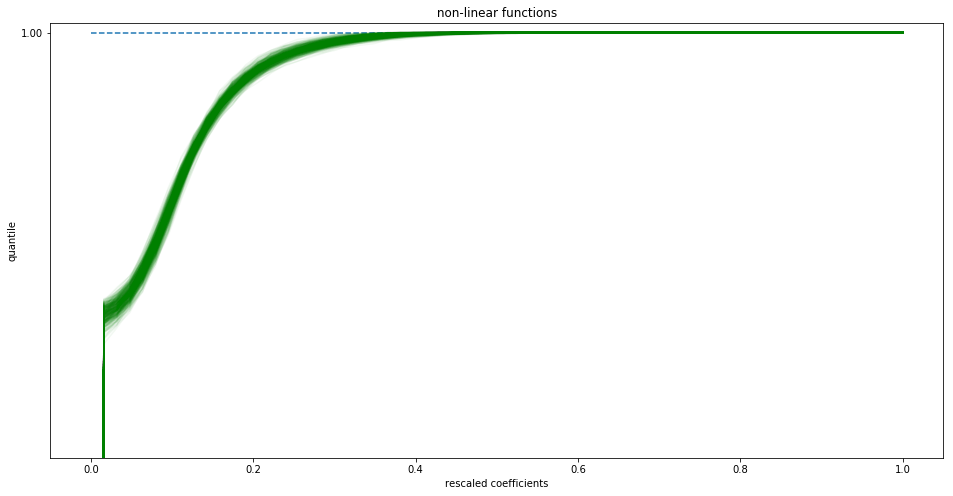

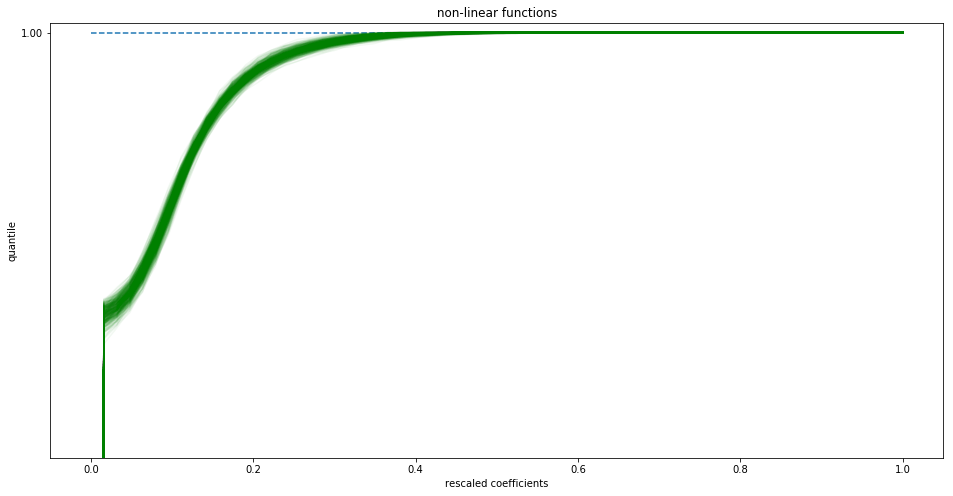

loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl


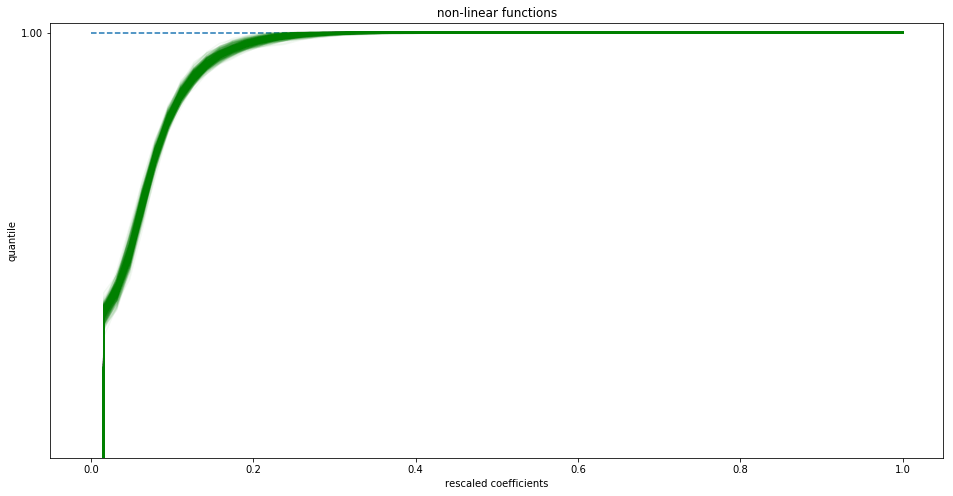

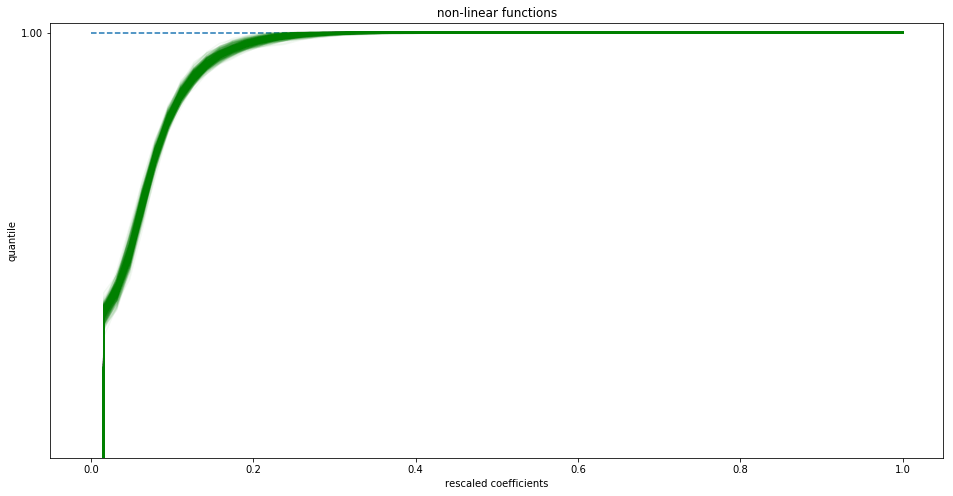

loading the dico called : data_cache/rescaling - C=0.50000_dico.pkl
loading the dico called : data_cache/rescaling - C=0.50000_dico.pkl
loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl
loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl
loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl
loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl
loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl
loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl
loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl
loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl
loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl
loading the dico called : data_cache/rescaling -

loading the dico called : data_cache/rescaling - C=0.50000_dico.pkl
loading the dico called : data_cache/rescaling - C=0.50000_dico.pkl
loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl
loading the dico called : data_cache/rescaling - C=0.79370_dico.pkl
loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl
loading the dico called : data_cache/rescaling - C=1.25992_dico.pkl
loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=2.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl
loading the dico called : data_cache/rescaling - C=3.17480_dico.pkl
loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl
loading the dico called : data_cache/rescaling - C=5.03968_dico.pkl
loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl
loading the dico called : data_cache/rescaling - C=8.00000_dico.pkl


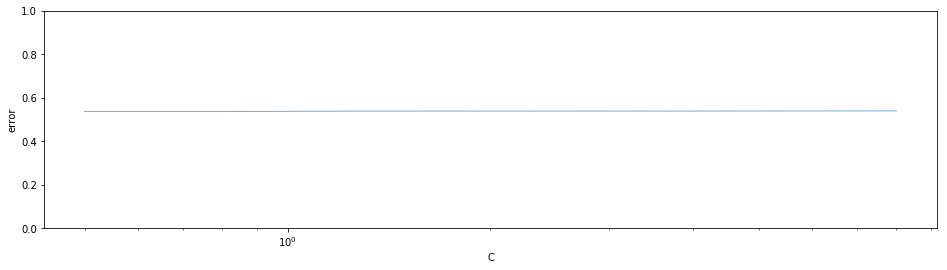

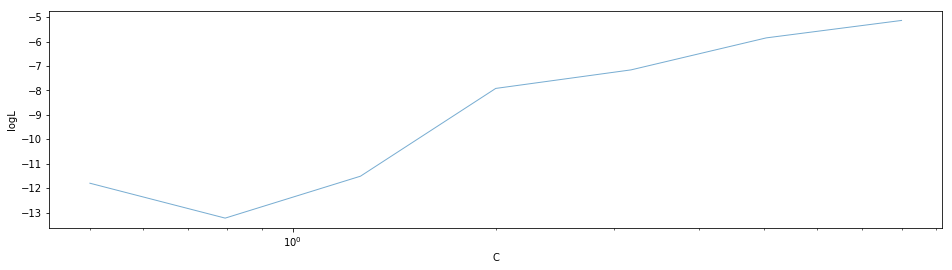

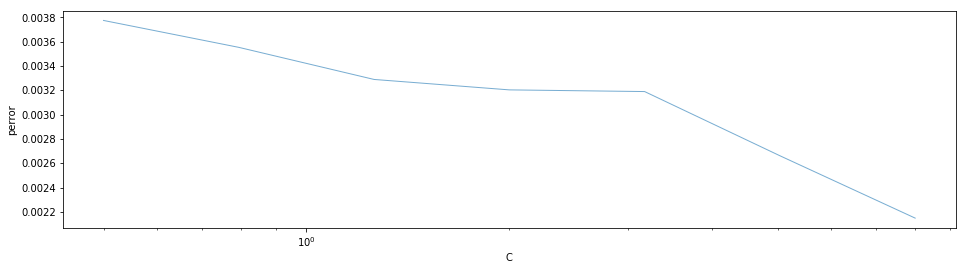

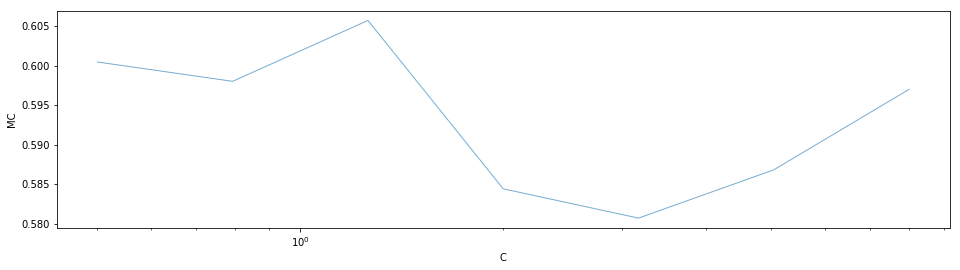

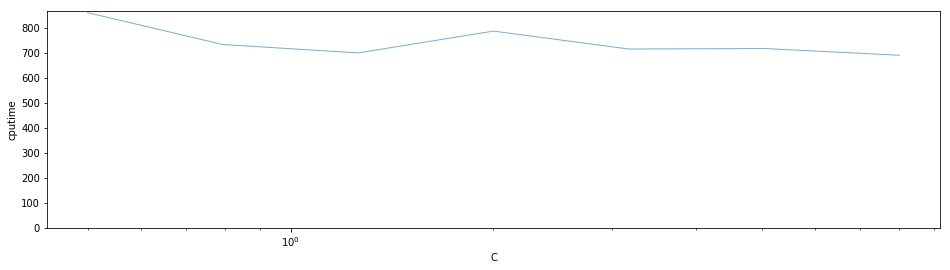

In [5]:
opts = dict(homeo_method='HEH', verbose=1)
experiments = SHL_set(opts, tag=tag)

experiments.scan(variable='C', list_figures=list_figures, display='')
plt.show()
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='C', list_figures=[], display='final', display_variable=display_variable)
    #plt.show()

## different quantization parameters

with a fixed $C$, we now change the number of quantization steps used to compute the histogram:

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (65520, 324) - done in 0.08s.
No cache found data_cache/rescaling - nb_quant=16_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_learning] Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  129 /   1025 (elapsed time:  89s,   1mn  29s)
Iteration  257 /   1025 (elapsed time:  179s,   2mn  59s)
Iteration  385 /   1025 (elapsed time:  269s,   4mn  29s)
Iteration  513 /   1025 (elapsed time:  358s,   5mn  58s)
Iteration  641 /   1025 (elapsed time:  448s,   7mn  28s)
Iteration  769 /   1025 (elapsed time:  543s,   9mn   3s)
Iteration  897 /   1025 (elapsed time:  633s,  10mn  33s)
Iteration  1025 /   1025 (elapsed time:  724s,  12mn   4s)
done in 731.32s.
loading the dico called : data_cache/rescaling - nb_quant=16_dico.pkl
No cache found data_cache/rescaling - nb_quant=25_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
[dict_lear

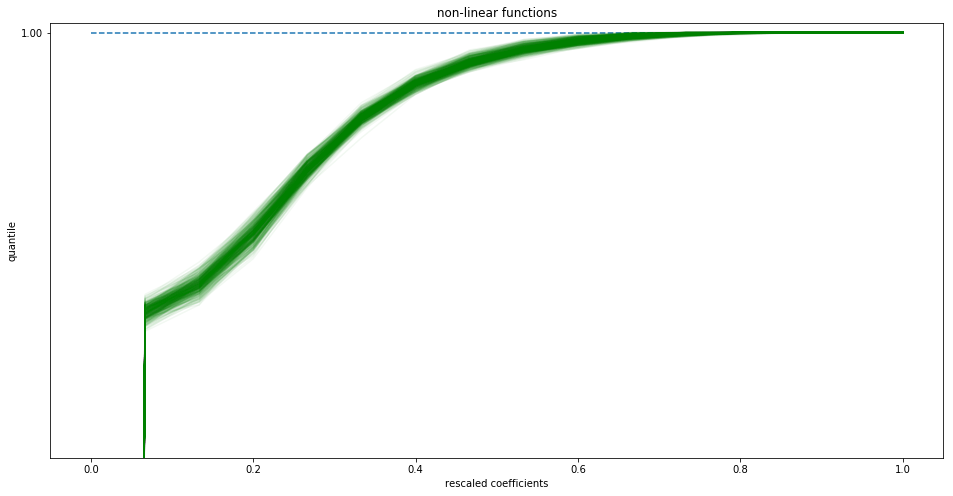

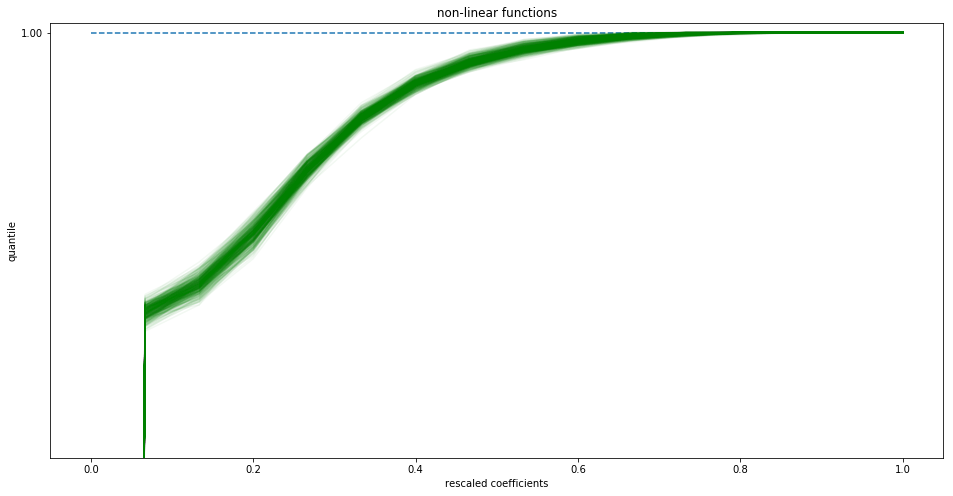

loading the dico called : data_cache/rescaling - nb_quant=25_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=25_dico.pkl


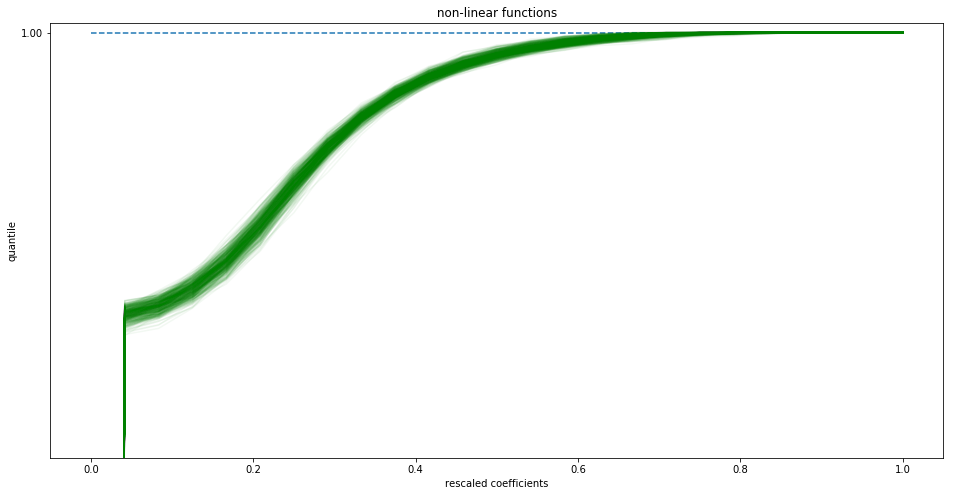

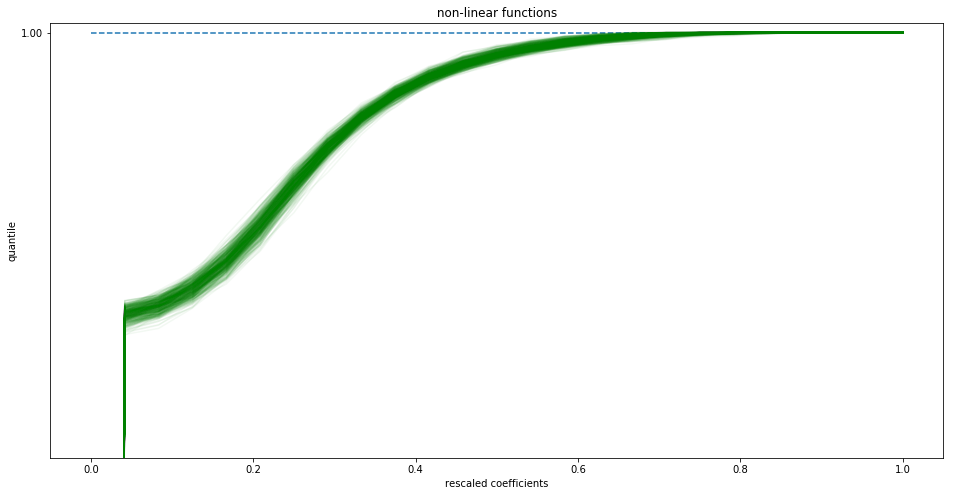

loading the dico called : data_cache/rescaling - nb_quant=40_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=40_dico.pkl


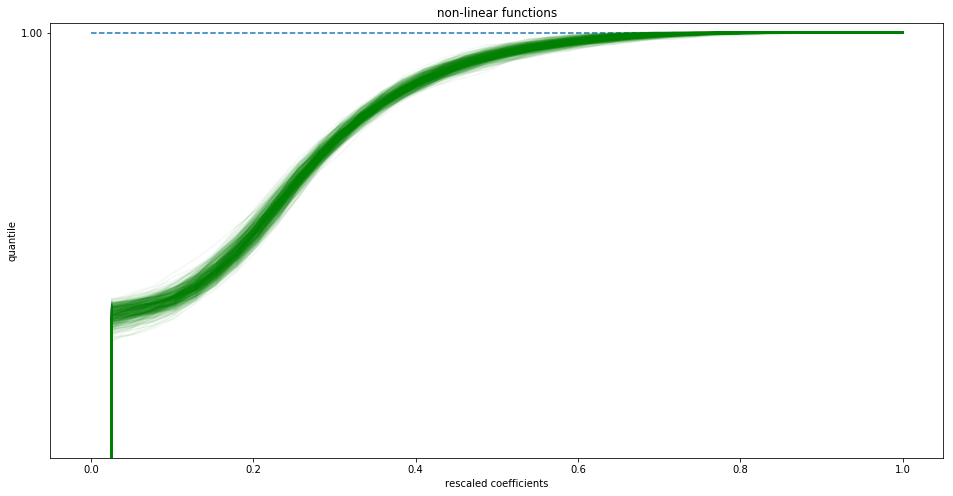

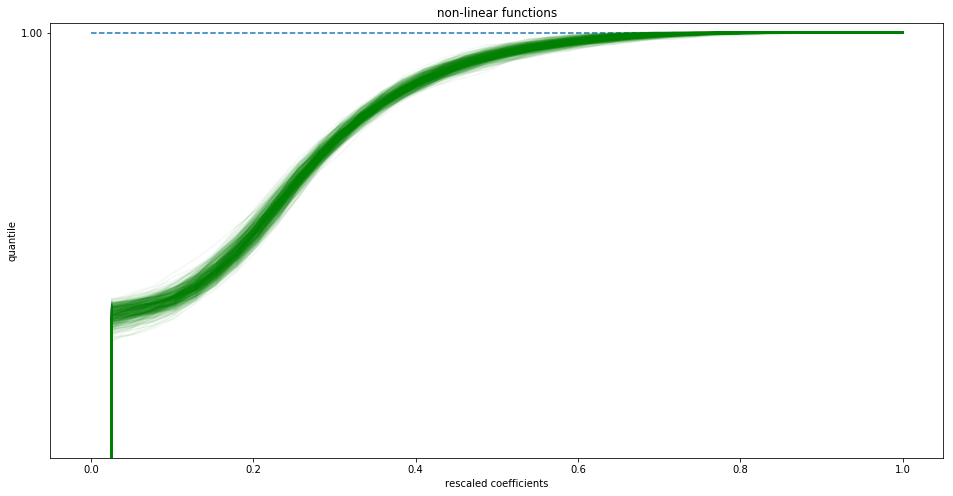

loading the dico called : data_cache/rescaling - nb_quant=64_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=64_dico.pkl


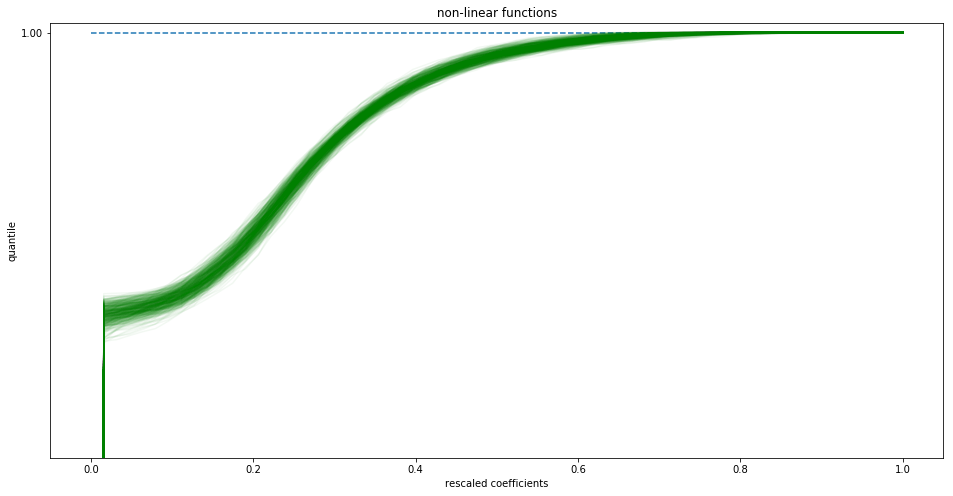

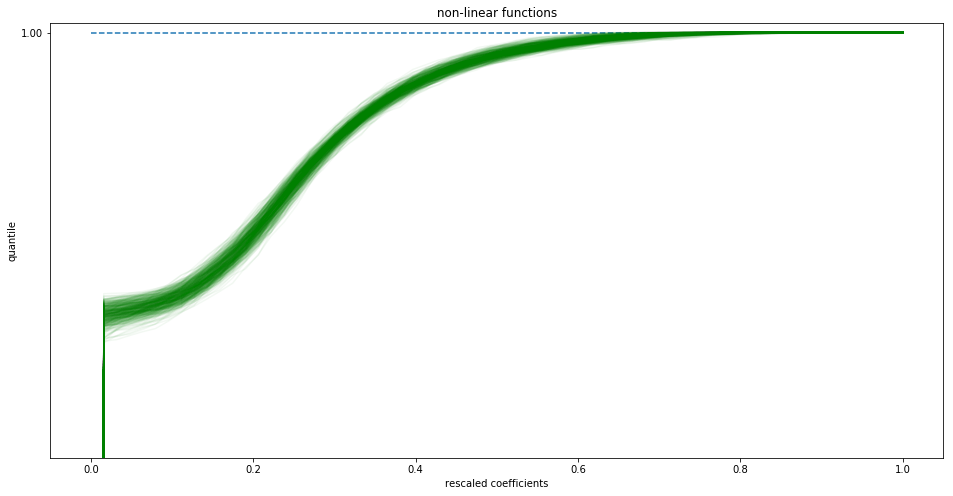

loading the dico called : data_cache/rescaling - nb_quant=101_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=101_dico.pkl


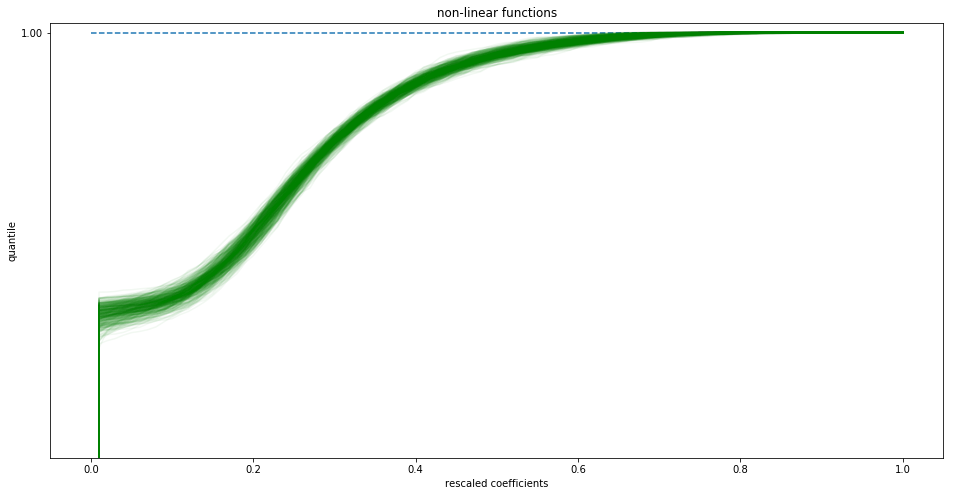

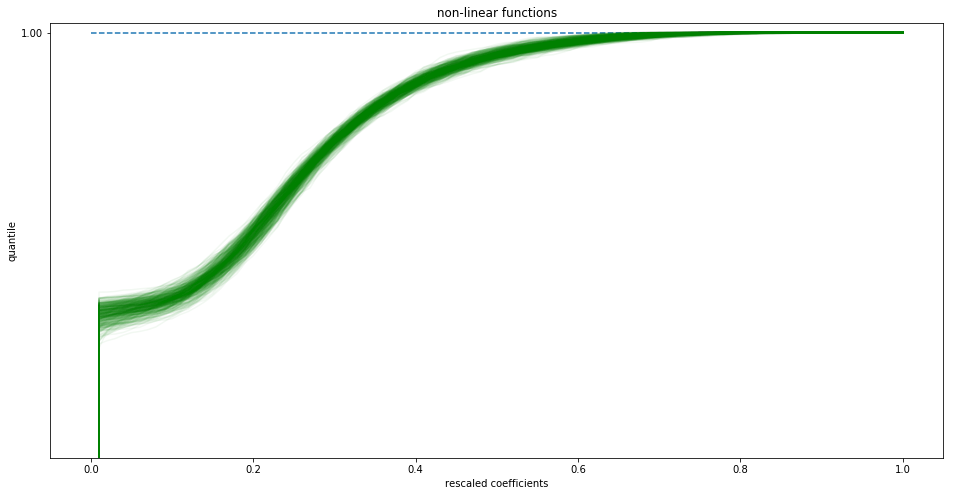

loading the dico called : data_cache/rescaling - nb_quant=161_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=161_dico.pkl


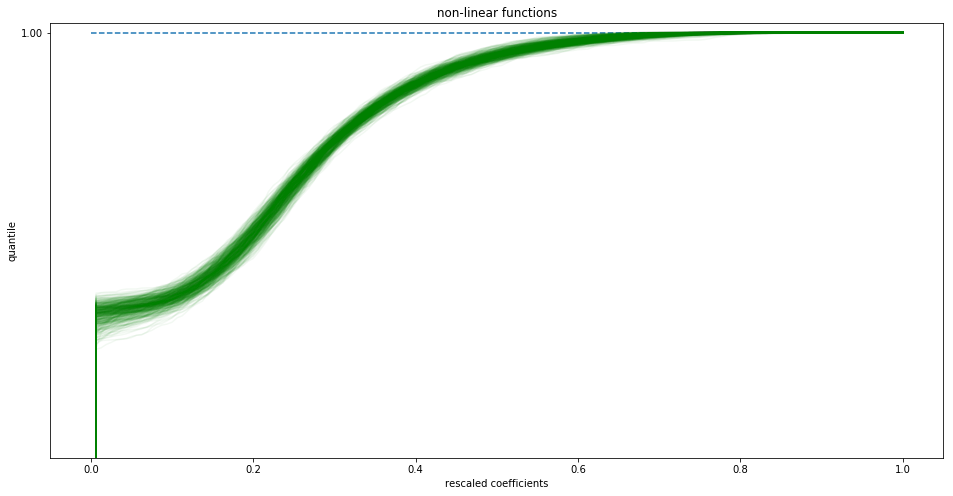

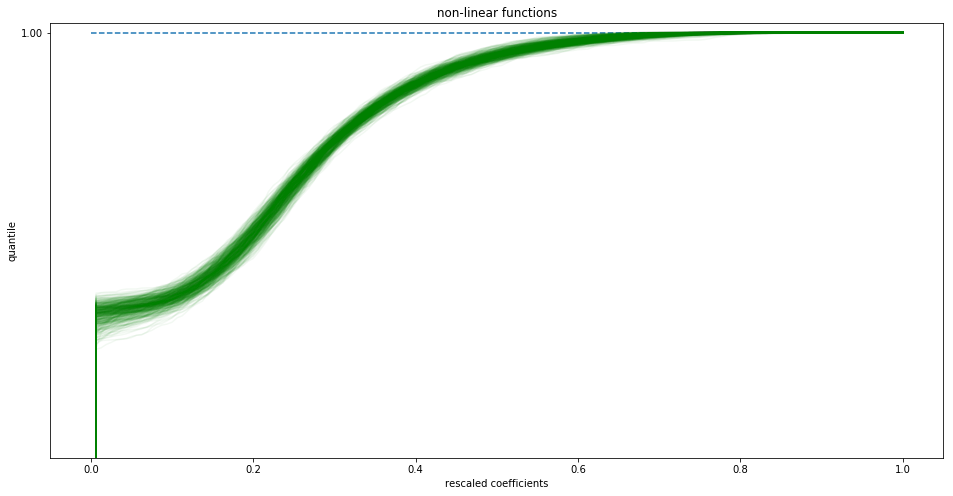

loading the dico called : data_cache/rescaling - nb_quant=256_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=256_dico.pkl


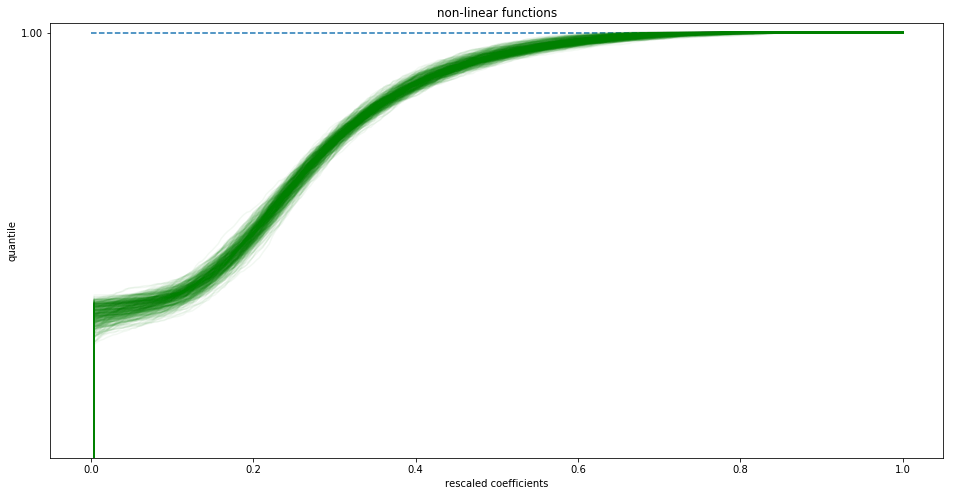

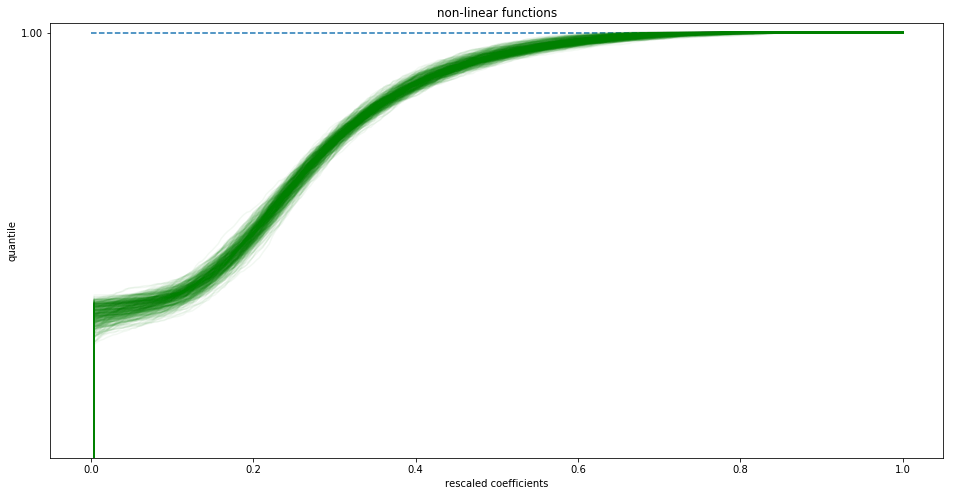

loading the dico called : data_cache/rescaling - nb_quant=16_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=16_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=25_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=25_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=40_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=40_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=64_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=64_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=101_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=101_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=161_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=161_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=256_dico.pkl
loading the dico called : data_cache/rescaling - nb_quant=256_dico.pkl
loading the di

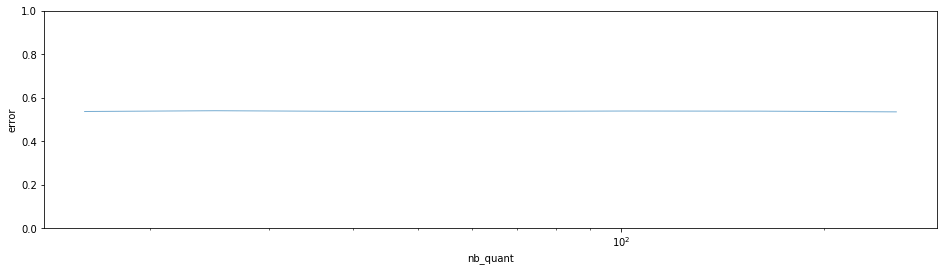

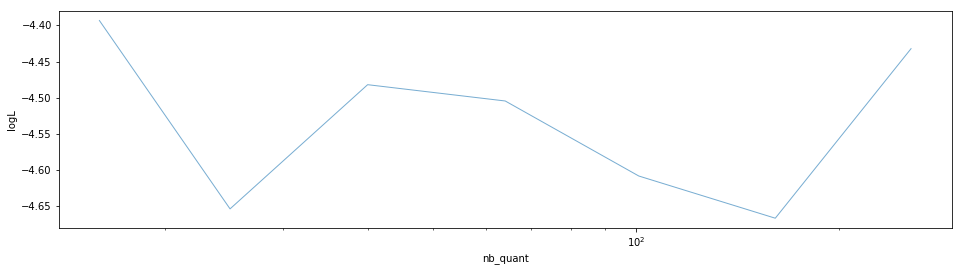

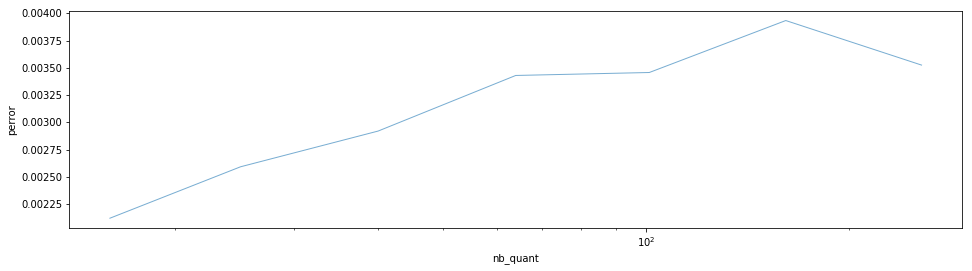

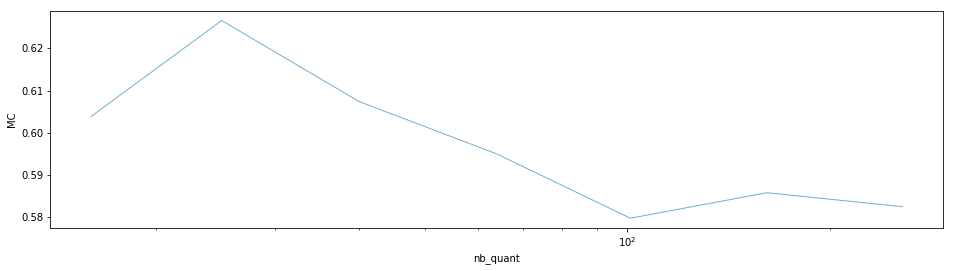

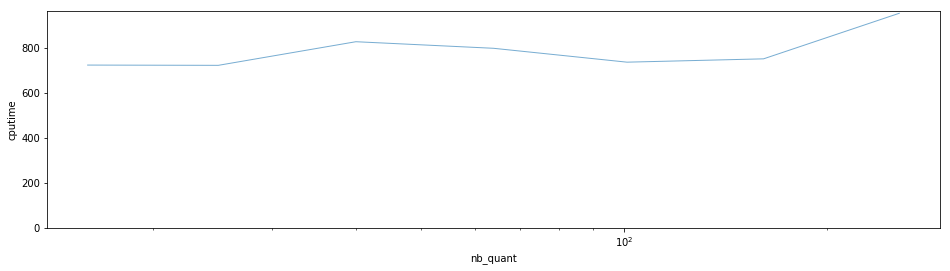

In [6]:
opts = dict(homeo_method='HEH', verbose=1)
experiments = SHL_set(opts, tag=tag)

experiments.scan(variable='nb_quant', list_figures=list_figures, display='')
plt.show()
for display_variable in display_variables:
    fig, ax = experiments.scan(variable='nb_quant', list_figures=[], display='final', display_variable=display_variable)
    #plt.show()

## Version used

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
Mon May 14 17:30:41 2018 CEST